# 최종 목표
 * Radar Bounding Box와 YOLOv5의 Bounding Box의 IoU연산을 통해 약 0.5이상이면 같은 객체라고 판단한다. 

In [5]:
!pip install plotnine

In [1]:
#import warnings
#warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import * 

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

%matplotlib inline

# Case 1

## 실제 SRS Radar에서 출력한 좌표 -> 각 사람의 좌표로 변환 예정

In [2]:
X=[0.28681617975234985, 0.30336329340934753, 0.31853145360946655, 0.49641263484954834, 0.31439465284347534, -0.44815027713775635, -0.827354371547699, 0.12134531140327454, 0.12410315871238708, 0.12686100602149963, 0.12961885333061218, 0.06618835031986237, 0.0, 0.09790360182523727, 0.28681617975234985, 0.30336329340934753, 0.31853145360946655, 0.49641263484954834, -0.4302242696285248, -0.44815027713775635, -0.827354371547699, 0.06067265570163727, 0.12410315871238708, 0.12686100602149963, 0.12961885333061218, 0.06618835031986237, 0.0, 0.09790360182523727, 0.28681617975234985, 0.30336329340934753, 0.31853145360946655, 0.31439465284347534, -0.44815027713775635, -0.827354371547699, 0.12134531140327454, 0.12410315871238708, 0.12686100602149963, 0.12961885333061218, 0.13237670063972473, 0.0, 0.19580720365047455]
Y=[0.20431827008724213, 0.31429967284202576, 0.36543557047843933, 0.04479934647679329, 0.050522807985544205, 0.6425521969795227, 0.6072335243225098, 1.9358149766921997, 1.981252908706665, 2.0258052349090576, 2.065905809402466, 2.0953338146209717, 2.095629930496216, 3.127577066421509, 0.20540449023246765, 0.31076741218566895, 0.36382991075515747, 0.09241703152656555, 0.7147309184074402, 0.6872629523277283, 0.6388557553291321, 1.9346977472305298, 1.9789328575134277, 2.02502703666687, 2.0685365200042725, 2.1028621196746826, 2.1111643314361572, 3.121110200881958, 0.20248816907405853, 0.31704026460647583, 0.3661796748638153, 0.14022351801395416, 0.5970680713653564, 0.5548479557037354, 1.9375559091567993, 1.9817101955413818, 2.024836778640747, 2.0617923736572266, 2.0784993171691895, 2.0791385173797607, 3.126051187515259]

In [3]:
names_dic = {'x':X, 'y': Y}
d1 = pd.DataFrame(names_dic)

In [4]:
d1.head()

,x,y
0,0.286816,0.204318
1,0.303363,0.314300
2,0.318531,0.365436
3,0.496413,0.044799
4,0.314395,0.050523


In [5]:
z=StandardScaler()

In [6]:
d1[["x","y"]]=z.fit_transform(d1[["x","y"]])

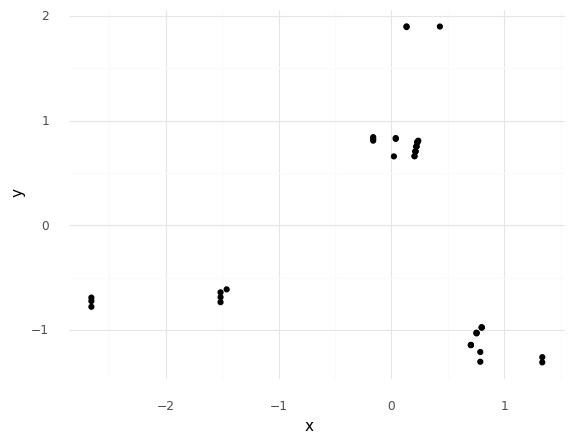

<ggplot: (112292433683)>

In [7]:
ggplot(d1,aes(x="x",y="y"))+geom_point()+theme_minimal()

In [8]:
db1=DBSCAN(eps=0.5,min_samples=5).fit(d1)

In [9]:
labsList=["Noise"]
labsList=labsList+["Cluster"+str(i) for i in range(1,len(set(db1.labels_)))]

In [10]:
d1["assignments"]=db1.labels_

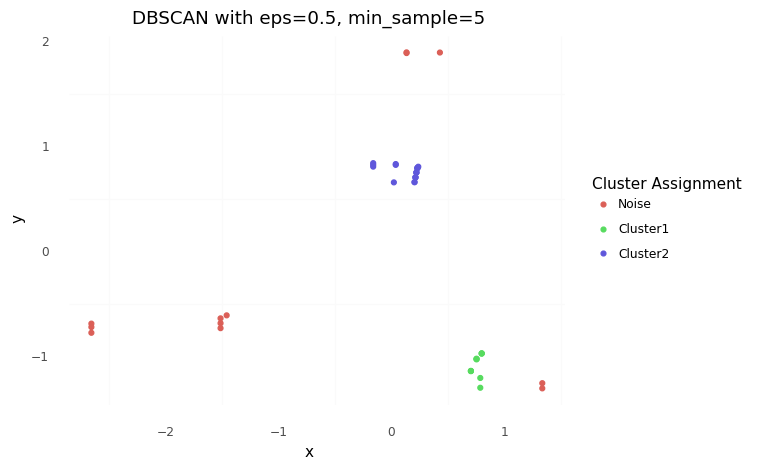

<ggplot: (112292953516)>

In [11]:
(ggplot(d1,aes(x="x",y="y",color="factor(assignments)"))+geom_point()+theme_minimal()+scale_color_discrete(name="Cluster Assignment",labels=labsList)+theme(panel_grid_major=element_blank())+labs(title="DBSCAN with eps=0.5, min_sample=5"))

## 여기서 부터 Warning이 뜨긴 하지만 큰 문제는 없다.(이미 위에서 끝났기 때문, 아래부터는 just 참고!)

In [12]:
d1_clustered=d1.loc[(d1.assignments>=0)]

silhouette_score(d1_clustered[["x","y"]],d1_clustered[["assignments"]])

C:\Users\JKK\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9155297772288603

확실히 클러스터가 상당히 응집력이 있고 적어도 노이즈가 없는 데이터 포인트만 고려할 때 분리되어 있다는 것을 의미합니다. 그러나 기술적으로 노이즈 클러스터를 포함한 실루엣 점수도 계산할 수 있습니다.

In [13]:
silhouette_score(d1[["x","y"]],d1[["assignments"]])

C:\Users\JKK\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.6072944064169457

데이터 변환 경고: 1d 배열이 예상되었을 때 열-벡터가 전달되었습니다. 예를 들어, ravel()을 사용하여 y의 모양을 (n_sample, )로 변경하십시오.

# Case 2

In [14]:
d2 = pd.DataFrame(names_dic)

In [15]:
z=StandardScaler()


In [16]:
d2[["x","y"]]=z.fit_transform(d2)

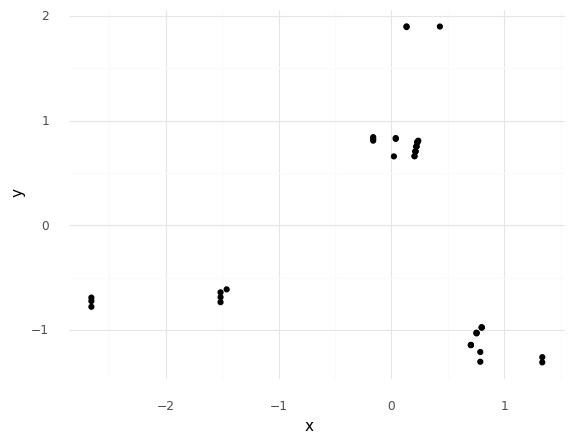

<ggplot: (112292994211)>

In [17]:
ggplot(d2,aes(x="x",y="y"))+geom_point()+theme_minimal()

In [18]:
db2=DBSCAN(eps=0.5,min_samples=5).fit(d2)

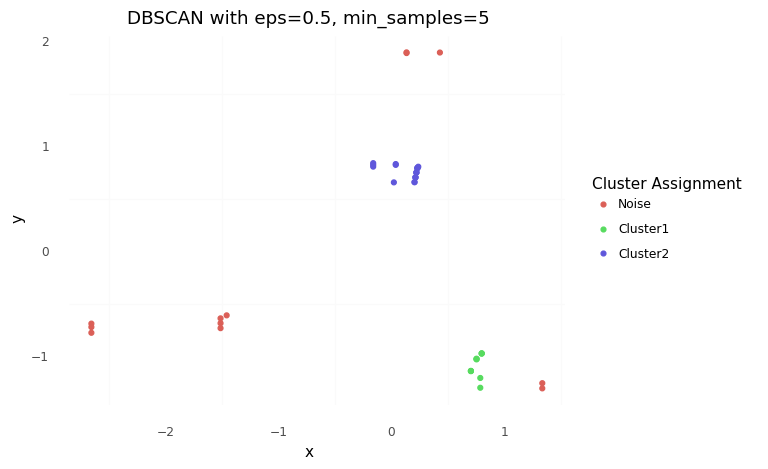

<ggplot: (112293064641)>

In [19]:
labsList=["Noise"]
labsList=labsList+["Cluster"+str(i) for i in range(1,len(set(db2.labels_)))]

d2["assignments"]=db2.labels_
(ggplot(d2,aes(x="x",y="y",color="factor(assignments)"))+
geom_point()+
theme_minimal()+
scale_color_discrete(name="Cluster Assignment", labels=labsList)+
theme(panel_grid_major=element_blank())+
labs(title="DBSCAN with eps=0.5, min_samples=5"))

In [20]:
d2_clustered=d2.loc[(d2.assignments>=0)]

print(silhouette_score(d2_clustered[["x","y"]],d2_clustered["assignments"]))

print(silhouette_score(d2[["x","y"]],d2["assignments"]))

0.9155297772288603
0.6072944064169457


# Case 3

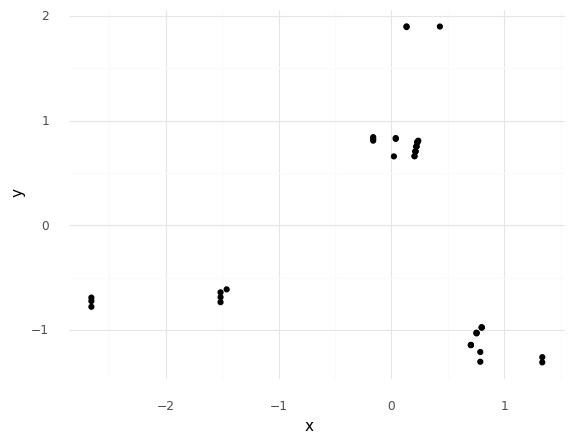

<ggplot: (112293100075)>

In [21]:
d3 = pd.DataFrame(names_dic)
z=StandardScaler()
d3[["x","y"]]=z.fit_transform(d3)
ggplot(d3,aes(x="x",y="y"))+geom_point()+theme_minimal()

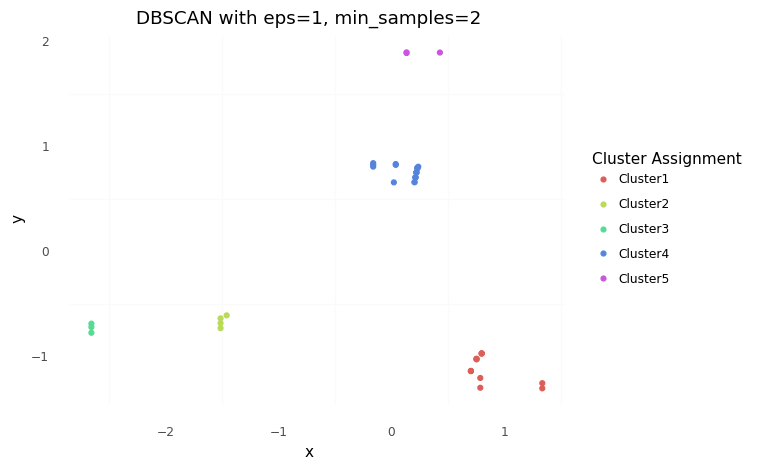

<ggplot: (112293132722)>

In [22]:
db3=DBSCAN(eps=1,min_samples=2).fit(d3)

labsList=["Cluster"+str(i) for i in range(1,len(set(db3.labels_))+1)]

d3["assignments"]=db3.labels_
(ggplot(d3,aes(x="x",y="y",color="factor(assignments)"))+
geom_point()+
theme_minimal()+
scale_color_discrete(name="Cluster Assignment", labels=labsList)+
theme(panel_grid_major=element_blank())+
labs(title="DBSCAN with eps=1, min_samples=2"))

In [23]:
d3_clustered=d3.loc[(d3.assignments>=0)]

print(silhouette_score(d3_clustered[["x","y"]],d3_clustered["assignments"]))

print(silhouette_score(d3[["x","y"]],d3["assignments"]))

0.8654046095792081
0.8654046095792081


# Case 4 

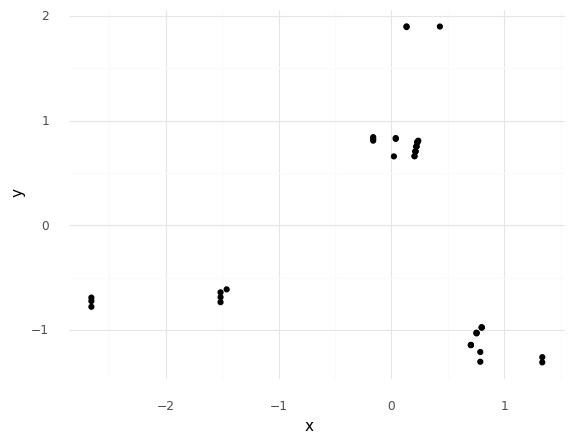

<ggplot: (112293065460)>

In [24]:
d4 = pd.DataFrame(names_dic)
z=StandardScaler()
d4[["x","y"]]=z.fit_transform(d4)
ggplot(d4,aes(x="x",y="y"))+geom_point()+theme_minimal()

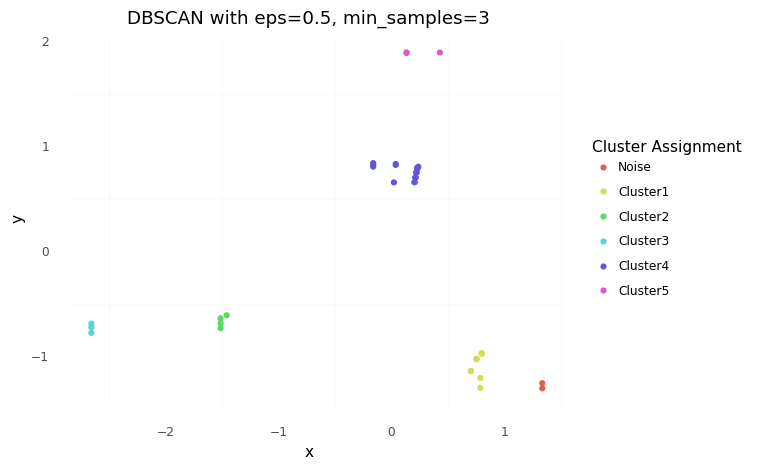

<ggplot: (112293060060)>

In [25]:
db4=DBSCAN(eps=0.5,min_samples=3).fit(d4)

labsList=["Noise"]
labsList=labsList+["Cluster"+str(i) for i in range(1,len(set(db4.labels_)))]

d4["assignments"]=db4.labels_

(ggplot(d4,aes(x="x",y="y",color="factor(assignments)"))+
geom_point()+
theme_minimal()+
scale_color_discrete(name="Cluster Assignment", labels=labsList)+
theme(panel_grid_major=element_blank())+
labs(title="DBSCAN with eps=0.5, min_samples=3"))